In [1]:
import requests
import time 

import datetime
import pandas as pd
from bs4 import BeautifulSoup

<!DOCTYPE html>
<html class="Fz(62.5%) Pos(r) desktop bktnews-US-es-US-def ua-undefined ua-undefined" id="atomic" lang="es-US">
 <head>
  <script>
   window.performance.mark('PageStart');
        document.documentElement.className += ' JsEnabled jsenabled';
        /**
        * Empty darlaOnready method, to avoid JS error.
        * This can happen when Async Darla JS file is loaded earlier than Darla Proxy JS.
        * This method will be overridden by Darla Proxy
        */
        window.darlaOnready = function() {};
  </script>
  <title>
   Ciudad Juárez, México - Pronóstico del tiempo | Mapas | Noticias: Yahoo Clima
  </title>
  <meta content="text/html, charset=utf-8" http-equiv="content-type"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="" name="msvalidate.01"/>
  <meta content="#6e329d" name="msapplication-TileColor"/>
  <meta content="https
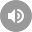
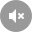
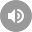
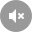
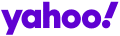
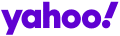
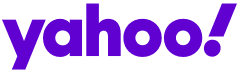
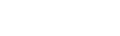
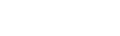
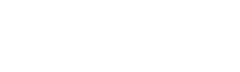

In [2]:
pagina_web = requests.get("https://es-us.noticias.yahoo.com/clima/mexico/chihuahua/ciudad-juarez-116556")
soup = BeautifulSoup(pagina_web.text, 'html.parser')
print(soup.prettify())

In [ ]:
def extraer():
   
    fecha_actual = datetime.datetime.now()
    dia=fecha_actual.strftime('%A %d %b %Y')
    hora=fecha_actual.strftime("%H:%M")
    fecha= dia+" " +hora

    tempsf=[]
    tempf_items = soup.find_all('span', class_="Va(t) D(b) fahrenheit celsius_D(n)")
    for item in tempf_items:
        tempf= item.text
        tempsf.append(tempf)


    tempsc=[]
    tempc_items = soup.find_all('span', class_="Va(t) D(n) celsius celsius_D(b)")
    for item in tempc_items:
        tempc= item.text
        tempsc.append(tempc)


    detalles=[]
    detalle_items = soup.find_all('p', class_="Fz(1.40rem)--miw1024 Fz(1.12rem)")
    for item in detalle_items:
        detalle= item.text
        detalles.append(detalle)

    
    datos=[]
    datos.append({"Fecha": fecha, "Temperatura Celsius":tempsc, "Temperatura Fahrenheit":tempsf,"Condicion":detalles})
    
    df = pd.DataFrame(datos)
    
    
    archivo=open("datos-clima.csv","a")

    archivo.write(f"{datos}\n")
    archivo.close()
    



In [ ]:

extraer()